<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/NN_FeedForward_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Discente: Lucas Rabelo de Araujo Morais



# CIFAR-10 Dataset



O conjunto de dados CIFAR-10 consiste em um total de 60.000 imagens coloridas de baixa resolução, distribuídas em 10 classes distintas. Cada imagem tem dimensões de 32x32 pixels, totalizando 1.024 pixels por imagem. Essas 60.000 imagens são divididas em dois conjuntos: 50.000 para treinamento e 10.000 para teste. Cada uma das 10 classes contém 5.000 imagens de treinamento e 1.000 imagens de teste. As classes do CIFAR-10 representam categorias amplas, incluindo objetos do mundo real como carros, aviões, gatos, cachorros, entre outros. Este conjunto de dados é frequentemente usado como um benchmark para avaliar algoritmos de aprendizado de máquina e redes neurais convolucionais em tarefas de classificação de imagens. É um dos conjuntos de dados mais populares na área de visão computacional e aprendizado profundo.

## Motivo da Escolha


Anteriormente outra tentativa foi realizada com o Cow Lumpy Disease Dataset, [neste notebook com ANN](https://colab.research.google.com/drive/1473BJylSXEbVwf8bGGZjp4SrAaCZopYh#scrollTo=hxLK1tTdZFLd) e [neste notebook com CNN](https://colab.research.google.com/drive/1NyeMYUU5EaIlBqBeEJrAJ-2KjPv83GgT#scrollTo=b77pONC0YlQz), mas o modelo cnn entrou em overfitting, pela pequena quantidade de dados, provavelmente seria exigido muito mais tempo e esforço da GPU para realizar a previsão deste dataset com um modelo que não é pré-treinado, estratégias como data augmentation, etc. Portanto, o Cifar-10 foi escolhido por seu volume de elementos e sua questão mais didática referente a aplicação da atividade.


Mais informações sobre o CIFAR-10 estão na [documentação](https://www.tensorflow.org/datasets/catalog/cifar10?hl=pt-br) do tensorflow.




O significado de cada Label (que será categorizada de 0 a 9) também está na figura abaixo:

<img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="width: 600px;">

In [ ]:
import pandas as pd
import tensorflow as tf
import tensorflow.keras.datasets
#chamando os dados subdivididos entre treinamento e teste


(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_valid.shape

(10000, 32, 32, 3)

Quero uma divisão 80% para treinamento e 20% validação. O parâmetro shuffle da função train_test_split, randomiza o dataset para realizar a separação.

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np


X = np.concatenate([x_train, x_valid],axis=0)
y = np.concatenate([y_train, y_valid],axis=0)

In [ ]:
# Divisão 80 - 20

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=11) # random_state permite controlar a aleatoriedade e tornar o código mais previsível e reprodutível.

In [ ]:
print(x_train.shape)
print(x_valid.shape)

(48000, 32, 32, 3)
(12000, 32, 32, 3)


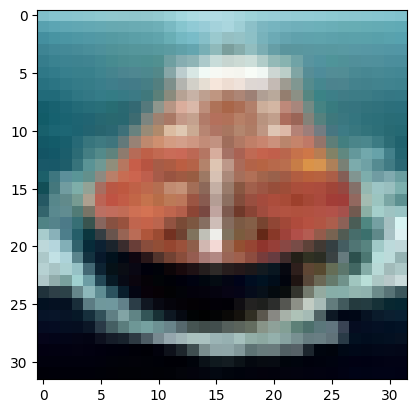

In [ ]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image)#boot


In [ ]:
print(y_train[0])# 8 = Barco

[8]


### Pré-Processamento



*Flattening* (Necessário para o input da rede neural, no caso do CIFAR-10 teremos que cada imagem será um vetor de $32\cdot32\cdot3$ onde $3$ corresponde o número de canais da imagem (RGB).

In [ ]:
x_train = x_train.reshape(len(x_train), 32*32*3)
x_valid = x_valid.reshape(len(x_valid), 32*32*3)

**Normalização** - Cada canal RGB contém pixels de 0 até 255, os valores são normalizados para garantir propriedades como convergência mais rápida, estabilidade númerica e redução do efeito de outliers


In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

**Categorical Enconding (Ortogonalização)**

Essa etapa é necessária pois temos mais de uma variável categórica, no vetor abaixo temos as labels antes do Hot Encoding aplicado


In [ ]:
y_train

array([[8],
       [6],
       [6],
       ...,
       [9],
       [3],
       [3]], dtype=uint8)

In [ ]:
import tensorflow.keras as keras
num_categories = 10 # categorias de 0 a 9

y_train = keras.utils.to_categorical(y_train, num_categories)# a função aplica o hot encoding
y_valid = keras.utils.to_categorical(y_valid, num_categories)

Por fim as labels estão em um formato apropriado para treinamento de redes neurais:


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Modelo de Rede Neural FeedForward



Usamos o modelo sequential do keras, indicando que estamos em uma estrutura feedforward, na camada inicial incluímos os neurônios de entrada (totalmente conectados) com um input vetorial de tamanho $32\cdot32\cdot3$. Na camada escondida temos 420 neurônios e na camada de saída temos 10 neurônios, que correspondem a quantidade de categorias do dataset.

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Dense(units=420, activation='relu', input_shape=(32*32*3,)))#camada de entrada
model.add(Dense(units = 420, activation='relu'))#camada escondida
model.add(Dense(units = 10, activation='softmax'))#camada de saída

### Sumário do Modelo (Será comentado no final, junto com a performance)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 420)               1290660   
                                                                 
 dense_1 (Dense)             (None, 420)               176820    
                                                                 
 dense_2 (Dense)             (None, 10)                4210      
                                                                 
Total params: 1471690 (5.61 MB)
Trainable params: 1471690 (5.61 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compilação do modelo

A métrica utilizada é a acurácia e a função de perda é a categorical_crossentropy, pois ela calcula a diferença entre as probabilidades previstas pelo modelo para cada classe e as classes reais (representadas em codificação one-hot), penalizando o modelo de acordo com a discrepância entre as previsões e os rótulos reais. A 'categorical_crossentropy' é uma função de perda apropriada para problemas de classificação multiclasse.

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/10
1500/1500 [==============================] - 24s 15ms/step - loss: 1.9168 - accuracy: 0.3125 - val_loss: 1.8129 - val_accuracy: 0.3364
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 1.7132 - accuracy: 0.3871 - val_loss: 1.6699 - val_accuracy: 0.4004
Epoch 3/10
1500/1500 [==============================] - 18s 12ms/step - loss: 1.6438 - accuracy: 0.4151 - val_loss: 1.6112 - val_accuracy: 0.4251
Epoch 4/10
1500/1500 [==============================] - 16s 10ms/step - loss: 1.6084 - accuracy: 0.4311 - val_loss: 1.6040 - val_accuracy: 0.4416
Epoch 5/10
1500/1500 [==============================] - 15s 10ms/step - loss: 1.5780 - accuracy: 0.4424 - val_loss: 1.6365 - val_accuracy: 0.4181
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 1.5651 - accuracy: 0.4504 - val_loss: 1.5909 - val_accuracy: 0.4343
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 1.5491 - accuracy: 0.4551 - val_loss: 1.5660 -

A função de perda no conjunto de treinamento dimunyi ao longo das épocas, e a acurácia aumenta. Isso indica que o modelo está aprendendo a se ajustar cada vez melhor aos dados de treinamento.

A perda no conjunto de validação (val_loss) está diminuindo nas primeiras épocas, mas parece começar a aumentar novamente a partir da época 3 ou 4, enquanto a acurácia parece estabilizar ou diminuir ligeiramente após esse ponto.

Com base nessas observações, é possível que o modelo esteja começando a sofrer de overfitting.

## Comentário Final

O total de Parâmetros no Modelo foi de 1.471.690 (aproximadamente 5.61 MB)

A quantidade de parâmetros em uma rede neural está diretamente relacionada à sua capacidade de aprender a partir dos dados. Modelos com mais parâmetros têm maior capacidade de aprendizado, mas também são mais propensos ao overfitting se não forem adequadamente regularizados, correspondendo ao caso do modelo que foi ajustado nos dados do CIFAR-10.

O comentário em relação a CNN (e a comparação de performance dos modelos) estará no notebook de CNN.